In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display_image(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
img = cv2.imread('../../notebooks/DATA/pennies.jpg', flags=cv2.IMREAD_COLOR)

In [5]:
img = cv2.medianBlur(img, ksize=35)

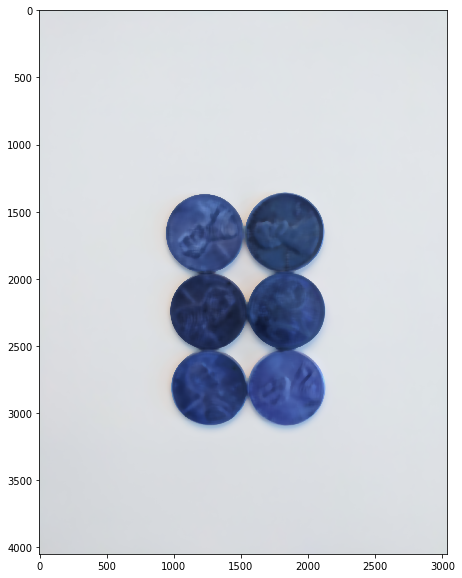

In [6]:
display_image(img)

In [7]:
gray_img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)

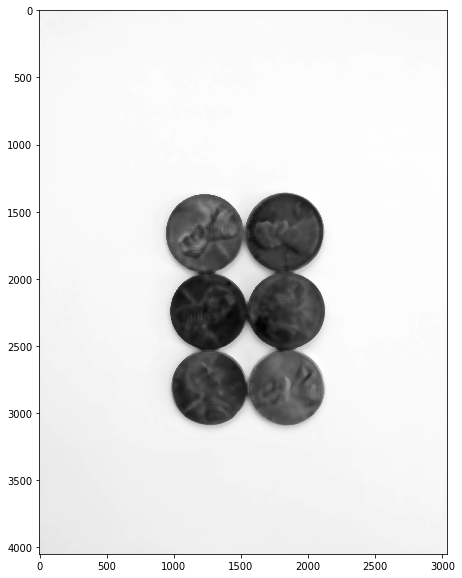

In [8]:
display_image(gray_img)

In [9]:
# Use Otsu's method to threshold this image.
# In computer vision and image processing, Otsu's method, named after Nobuyuki Otsu, is used to
# perform automatic image thresholding.[1] In the simplest form, the algorithm returns a single
# intensity threshold that separate pixels into two classes, foreground and background.
ret, threshold = cv2.threshold(gray_img,
                               thresh=0,
                               maxval=255,
                               type=cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


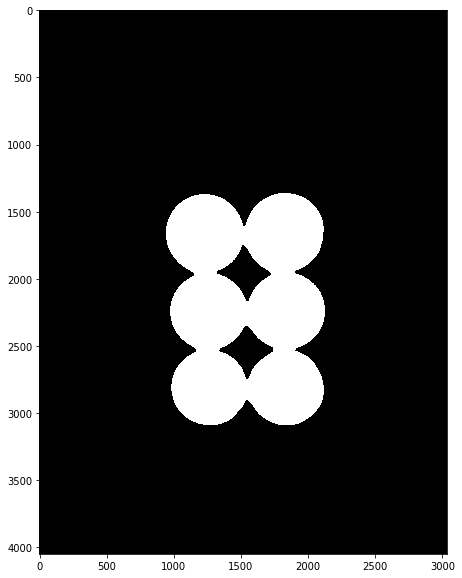

In [10]:
display_image(threshold)

In [11]:
# NOISE REMOVAL
kernel = np.ones((3, 3), dtype=np.int8)
opening = cv2.morphologyEx(threshold, op=cv2.MORPH_OPEN, kernel=kernel, iterations=2)

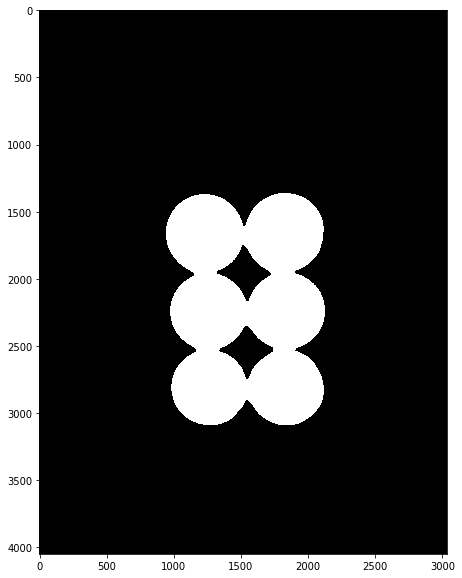

In [12]:
display_image(opening)

In [13]:
'''
PERFORM DISTANCE TRANSFORMATION - A distance transform, also known as distance map or distance
field, is a derived representation of a digital image. The choice of the term depends on the point
of view on the object in question: whether the initial image is transformed into another
representation, or it is simply endowed with an additional map or field.

Wiki - https://en.wikipedia.org/wiki/Distance_transform
'''

distance_transform = cv2.distanceTransform(opening, distanceType=cv2.DIST_L2, maskSize=5)

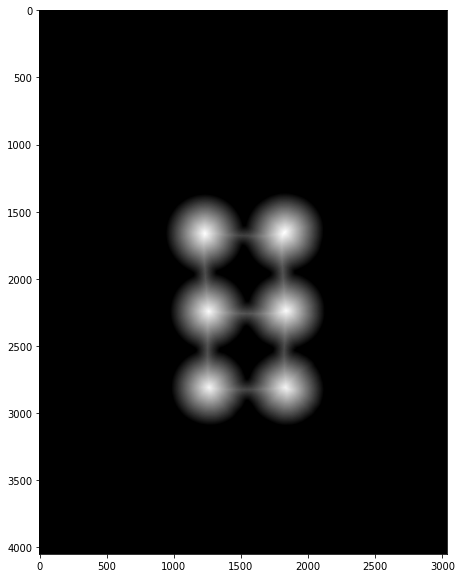

In [14]:
display_image(distance_transform)

In [15]:
# Get the threshold to apply for Watershed algorithm. Typical way to apply threshold to distance
# transformed image is, apply 70% of the max value of distance transformed image.
ret, sure_foreground = cv2.threshold(distance_transform,
                                     thresh=distance_transform.max() * 0.7,
                                     maxval=255, type=cv2.THRESH_BINARY)

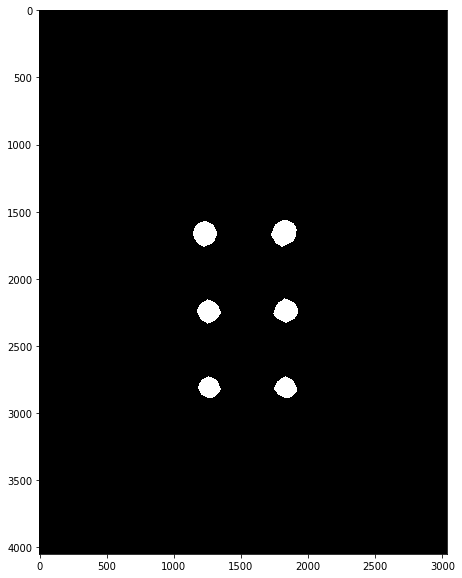

In [16]:
display_image(sure_foreground)

In [19]:
sure_background = opening
sure_foreground = np.uint8(sure_foreground)
# This is the region, not sure exactly a background or foreground.
unknown_region = cv2.subtract(sure_background, sure_foreground)

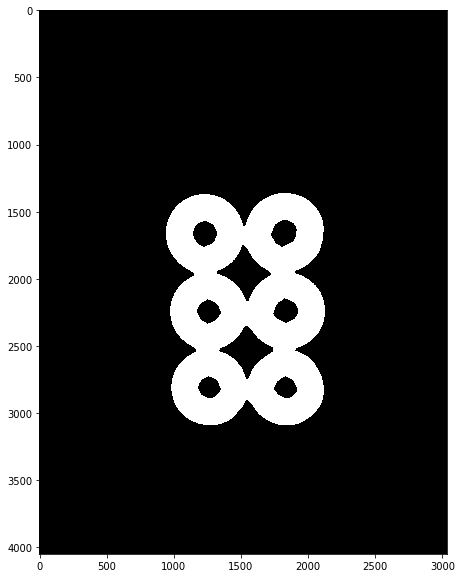

In [20]:
display_image(unknown_region)

In [24]:
# CREATE LABEL MARKER FOR WATERSHED ALGORITHM.
ret, markers = cv2.connectedComponents(sure_foreground)
# Mark the region of known, as 1 + current value, so we can mark the region unknown as 0.
# Each region known region has it's own different value. So each of the region values are unique.
# Each marker work as a seed for the watershed algorithm.
markers += 1

In [27]:
# Mark the locations of unknown as 0.
markers[unknown_region==255] = 0


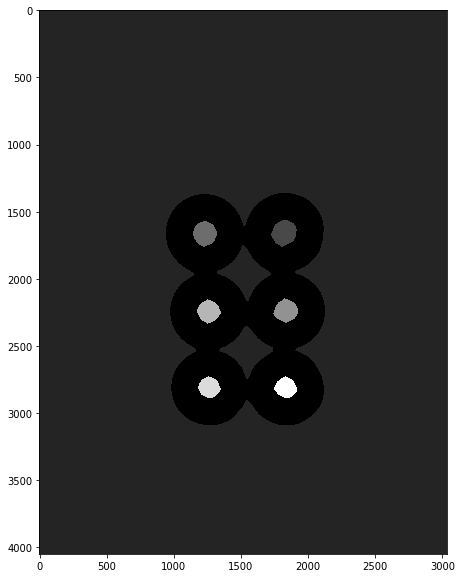

In [28]:
display_image(markers)

In [33]:
# INVOKE the WATERSHED ALGORITHM.
markers = cv2.watershed(img, markers)

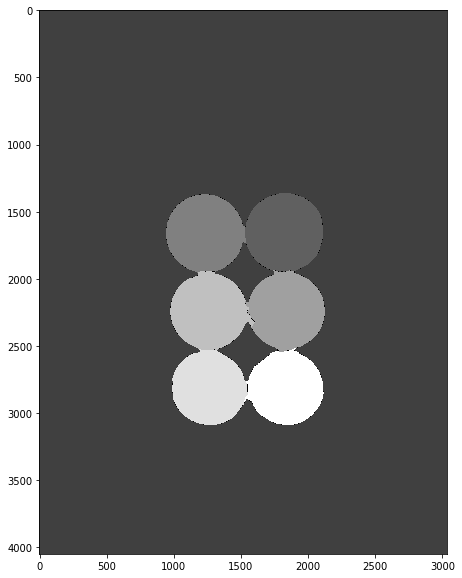

In [34]:
display_image(markers)

In [39]:
# Find the "Contours" of each of the marker.
image, contours, hierarchy = cv2.findContours(markers,
                                              mode=cv2.CONTOURS_MATCH_I2,
                                              method=cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):

    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image=img,
                         contours=contours,
                         contourIdx=i,
                         color=(255, 0, 0),
                         thickness=5)

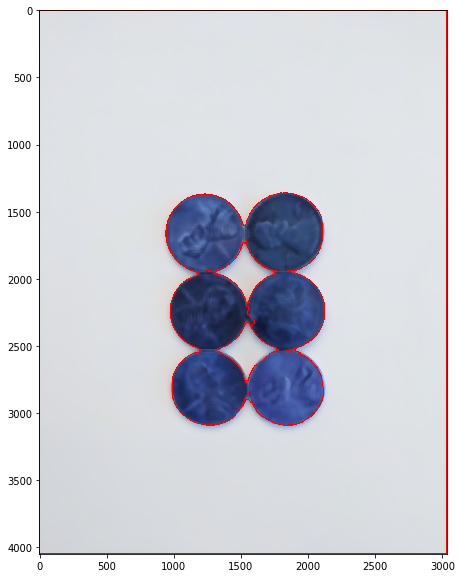

In [40]:
display_image(img)